In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airoplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
classes[9]

'truck'

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

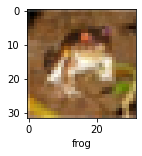

In [11]:
plot_sample(X_train, y_train, 0)

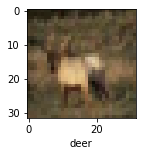

In [12]:
plot_sample(X_train, y_train, 3)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 75s 40ms/step - loss: 1.8126 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.6255 - accuracy: 0.4247
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5446 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4822 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4357 - accuracy: 0.4967


In [15]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.4905 - accuracy: 0.4691


[1.490484356880188, 0.4690999984741211]

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classificatiom Report: \n", classification_report(y_test, y_pred_classes))

Classificatiom Report: 
               precision    recall  f1-score   support

           0       0.57      0.55      0.56      1000
           1       0.56      0.60      0.58      1000
           2       0.33      0.43      0.37      1000
           3       0.44      0.20      0.27      1000
           4       0.39      0.43      0.41      1000
           5       0.45      0.29      0.35      1000
           6       0.53      0.50      0.51      1000
           7       0.64      0.43      0.52      1000
           8       0.69      0.50      0.58      1000
           9       0.36      0.76      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [17]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)), 
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [40]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.4596 - accuracy: 0.8377
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.4444 - accuracy: 0.8424
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.4273 - accuracy: 0.8481
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.4145 - accuracy: 0.8512
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.3956 - accuracy: 0.8587
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.3849 - accuracy: 0.8611
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.3785 - accuracy: 0.8644
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.3620 - accuracy: 0.8706
Epoch 9/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.3498 - accuracy: 0.8764
Epoch 10/10
1563/1563 [==============================] - 35s 23m

In [41]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.3840 - accuracy: 0.6734


[1.384036898612976, 0.6733999848365784]

In [42]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

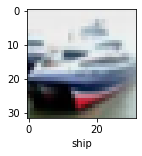

In [43]:
plot_sample(X_test, y_test, 1)

In [44]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.43101132e-03, 1.05785011e-05, 4.09701344e-04, 8.76607776e-01,
        1.07119786e-05, 1.18618989e-02, 1.76047935e-04, 1.76215043e-08,
        1.05492353e-01, 1.14959855e-08],
       [3.70144846e-07, 2.42191178e-04, 7.11704513e-13, 9.19216851e-13,
        1.04765437e-12, 1.44430366e-12, 1.90258076e-18, 6.82073694e-18,
        9.99757349e-01, 1.37665964e-07],
       [1.09779276e-01, 3.47740710e-01, 7.36192669e-05, 1.15463091e-03,
        8.31726356e-04, 9.81022604e-05, 3.36149064e-08, 9.78581375e-06,
        4.68545586e-01, 7.17664436e-02],
       [9.82397318e-01, 2.68014537e-06, 6.92394906e-07, 1.72186503e-06,
        8.99540176e-09, 2.62604990e-11, 1.34050396e-10, 7.03007444e-11,
        1.75974462e-02, 1.29509274e-07],
       [3.12455228e-10, 4.44529691e-11, 1.20079378e-03, 1.51243299e-01,
        5.44125497e-01, 1.03275629e-03, 3.02380174e-01, 1.86486315e-09,
        1.74536344e-05, 9.18917165e-11]], dtype=float32)

In [45]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

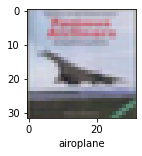

In [47]:
plot_sample(X_test, y_test, 3)

In [48]:
classes[y_classes[3]]

'airoplane'

In [49]:
print("Classificatiom Report: \n", classification_report(y_test, y_classes))

Classificatiom Report: 
               precision    recall  f1-score   support

           0       0.73      0.68      0.71      1000
           1       0.79      0.78      0.78      1000
           2       0.62      0.53      0.57      1000
           3       0.52      0.46      0.49      1000
           4       0.62      0.61      0.61      1000
           5       0.53      0.60      0.57      1000
           6       0.73      0.79      0.76      1000
           7       0.69      0.74      0.71      1000
           8       0.76      0.81      0.78      1000
           9       0.73      0.74      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

